# Семинар № 4. NotIntroAlready МО 2. 

In [22]:
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import metrics

# Метрики для классификации

## Матрица ошибок. Двухклассовая классификация
- $TP$ = кол-во пар, где: $y_{predicted} = 1$, $y_{real} = 1$
- $FP$ = кол-во пар, где: $y_{predicted} = 1$, $y_{real} = 0$ (ошибки первого рода)
- $TN$ = кол-во пар, где: $y_{predicted} = 0$, $y_{real} = 0$
- $FN$ = кол-во пар, где: $y_{predicted} = 0$, $y_{real} = 1$ (ошибки второго рода)

Первая буква - совпадает ли реальность с классификацией. Вторая - Что выдал классификатор.

<center>
<img src='confusionMatrxiUpdated.jpg' width = "500">
</center>

In [32]:
y_real = np.array([0, 1, 0, 0, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0])

M = metrics.confusion_matrix(y_real, y_predicted)
M

array([[2, 1],
       [3, 2]])

## Характеристики бинарного классификатора

$$accuracy = ACC = \frac{TP + TN}{TP + TN + FP + FN}$$

$$recall = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP}$$

$$precision = PPV = \frac{TP}{TP + FP},\quad FPR= \frac{FN}{TN + FP},$$

$$F_1 = 2\frac{PPV\cdot TRP}{PPV + TPR}, \quad F_{\beta} = (1 + \beta^2)\frac{PPV\cdot TRP}{\beta^2PPV + TPR}$$

$ACC$ (`Accuracy`) - доля верно классифицированных примеров среди всех примеров. Основная характеристика качества классификации.

$TPR$ (True positive rate, `recall`) - доля верно классифицированных положительных примеров среди всех положительных примеров.

$SPC$ (Specificity, true negative rate) - доля верно классифицированных отрицательных примеров среди всех отрицательных примеров.

$PPV$ (Positive predictive value, `precision`) - доля верно классифицированных положительных примеров среди всех примеров, классифицированных положительно.

$FPR$ (False positive rate) - доля ошибочно классифицированных отрицательных примеров среди всех отрицательных примеров.

$F_1$ (F1-measure) - среднее гармоническое точности и полноты. Позволяет учесть обе характеристики одновременно.


$F_{beta}$ (Fbeta-measure) - $F_1$ c возможностью контроллировать важность точности или полноты относительно друг друга.




In [33]:
accuracy = metrics.accuracy_score(y_real, y_pred)
recall = metrics.recall_score(y_real, y_pred)
precision = metrics.precision_score(y_real, y_pred)
f1 = metrics.f1_score(y_real, y_pred)
fb = metrics.fbeta_score(y_real, y_pred, beta=2)
print('accuracy: {}'.format(accuracy))
print('recall: {}'.format(recall))
print('precision: {}'.format(precision))
print('F1: {}'.format(f1))
print('Fb: {}'.format(fb))

accuracy: 0.625
recall: 0.6
precision: 0.75
F1: 0.6666666666666665
Fb: 0.625


## Другие материки качества
Существет еще много других метрик для бинарной классификации, например

$$LogLoss = -\frac{1}{n}\sum_{i=1}^{l}(y_{real}^i\log(y_{pred}^i) + (1-y_{real}^i)\log(1-y_{pred}^i))$$

$$brierloss = \sum_{i=1}^{n}(y_{real}^i - y_{pred}^{i})^2$$

Выбирать метрику нужно **исходя из задачи**, ведь каждая работает по своему и находит свое лучшее решение.

Логлосс например учитывает доли правильных и неправильных ответов, но сильно штрафует за уверенность классификатора в неверном ответе.

### Пример. Наша самодельная классификация

In [183]:
from sklearn.model_selection import train_test_split
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=1, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


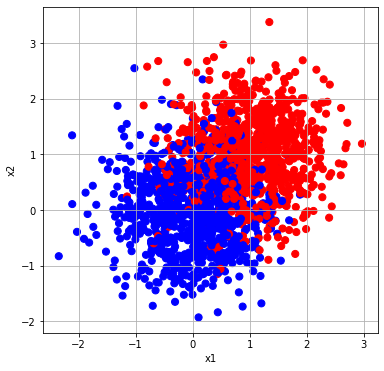

In [184]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(10)

И проведем кроссвалидацию по 3-м разным метрикам. В том числе напишем свою. 

In [186]:
acc_score = cross_val_score(clf, X_train, y_train, cv=5, 
                            scoring=metrics.scorer.accuracy_scorer)
nll = cross_val_score(clf, X_train, y_train, cv=5, 
                      scoring=metrics.scorer.neg_log_loss_scorer)

def my_score(y, y_pred):
    return ((y_pred - y)**2).sum()

my_score = cross_val_score(clf, X_train, y_train, cv=5, 
                           scoring=metrics.make_scorer(my_score))

In [187]:
acc_score, nll, my_score

(array([0.82548476, 0.8       , 0.81666667, 0.85      , 0.83286908]),
 array([-0.53062417, -1.02532309, -1.27380355, -0.59786643, -0.79783006]),
 array([63., 72., 66., 54., 60.]))

## [ROC-кривая и AUC](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0)

Пусть наш алгоритм предсказывает не только значения, но и **вероятности** получить то или иное значение. Возьмем массив вероятностей получить 1.

In [188]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

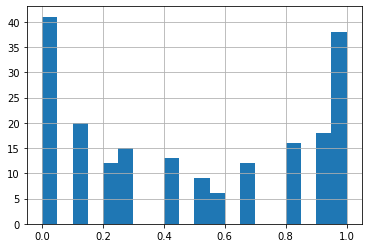

In [189]:
plt.hist(y_prob1, bins=20)
plt.grid()

А теперь разделим на наши классы, которые верно классифицировались и не верно классифицировались.

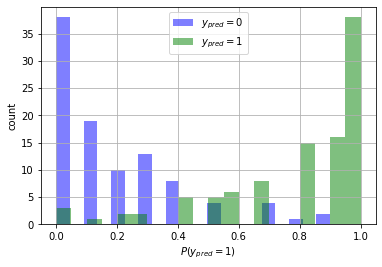

In [242]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

### ROC-кривая и AUC

**ROC-кривая** (Receiver Operating Characteristic) - это графическая характеристика качества бинарного классификатора, выражающая зависимость `TPR` от `FPR` при варьировании порога решающего правила.

Порог решающего правила: при какой вероятности мы присваиваем объекту класс 1.

Мы двигаемся справа налево и считаем `TPR` и `FPR` следующим образом: 
* TP - зеленые справа от порога.
* FP - синие справа от порога.
* TN - зеленые слева от порога.
* FN - синие слева от порога.

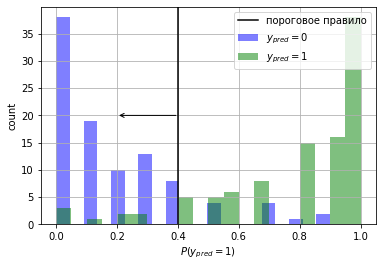

In [244]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.axvline(x=0.4, c='black', label='пороговое правило')
plt.annotate("", xy=(0.2, 20), xytext=(0.4, 20), arrowprops=dict(arrowstyle="->"))
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

Так пройдя все возможные значения для `TPR` и `FPR` мы получим несколько координат точек, по которым сможем нарисовать ROC кривую.

Функция, которая за нас все посчитает: 

In [246]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)

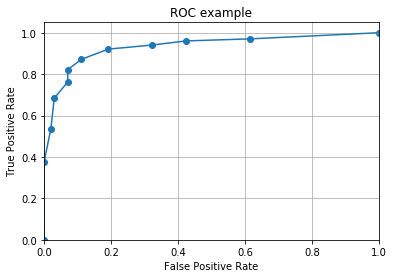

In [248]:
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

ROC-кривая проходит через точки (0, 0) и (1, 1) и монотонно не убывает. Чем ближе кривая внутри квадрата $[0, 1]\times[0, 1]$ к левому верхнему углу, тем лучше. Идеальный вариант - кривая, проходящая через три точки: (0, 0), (1, 1) и (0, 1). Диагональ данного квадрата соответствует случайному гаданию.

#### AUC - площадь под графиком ROC. Это основной показатель качества классификации.

In [250]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9327932793279328

### А что будет, если у нас классы будут полностью пересекаться?

In [251]:
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


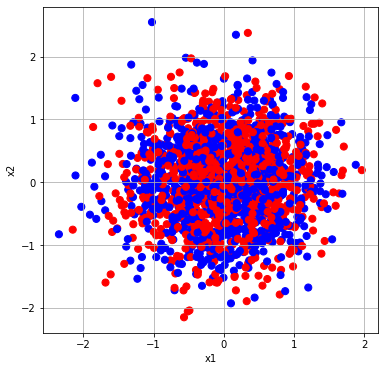

In [252]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [253]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

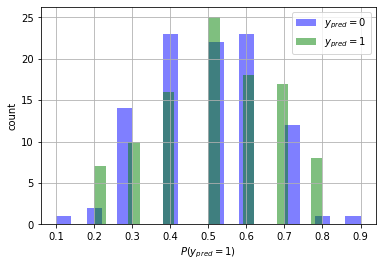

In [254]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

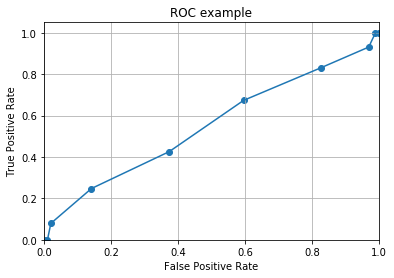

In [255]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

Roc-кривая близка к диагонали, что означает, что наш классификатор бесполезен и работает не лучше рандома.

## Многоклассовая классификация
В случае, когда число классов больше двух, матрица ошибок определяется аналогичным образом: на пересечении $i$-ой строки и $j$-го столбца стоит число примеров $i$-го класса, отнесённых классификатором к классу $j$. 

In [259]:
true_labels = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
predicted_labels = np.array([0, 2, 0, 2, 1, 0, 0, 1, 2])

M = metrics.confusion_matrix(true_labels, predicted_labels)
M

array([[2, 0, 1],
       [0, 2, 1],
       [2, 0, 1]])

### One vs. All
Многоклассовая классификация может быть сведена к бинарной различными способами. Одним из них является подход One vs. All. Его суть в следующем: для каждого класса $i \in \{1, \dots, k\}$ обучим бинарный классификатор $a_i(x) = \mbox{sign}f_i(x)$ на исходной выборке с изменёнными метками (объекты $i$-го класса получают метку 1, все оставшиеся объекты - метку 0), то есть мы учим $a_i$ отличать $i$-ый класс от всех остальных. После чего итоговый классификатор строится как $a(x) = \mbox{argmax}_{i \in \{1, \dots, k\}} f_i(x)$, то есть он выдаёт класс с наибольшей оценкой $f_i(x)$. 

In [261]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
# Fitting One vs. All version of linear SVM
onevsall = OneVsRestClassifier(LinearSVC()).fit(X, y) 
metrics.accuracy_score(y, onevsall.predict(X))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9666666666666667

## Регрессия

Для регрессии также существуют свои метрики качества, например 
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(a(x^i) - y^i_{real})^2}{y^i_{real} - \overline{y}}\quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$$

Вызывается она аналогичным образом

In [262]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
metrics.r2_score(y_true, y_pred)  

0.9486081370449679

# Подготовка данных или Feature [Preprocessing](https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa)

Здесь мы рассмотрим несколько важных моментов связанных с подговкой данных к обучению.

## Feature Engineering

Под этим словосочетанием подразумевают создание и подготовку признаков объектов, чтобы они лучше подходили под алгоритмы и давали наилучший результат. Рассмотрим пример концентрических окружностей.

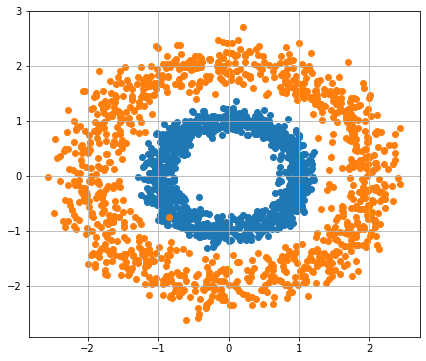

In [325]:
from random import gauss

num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# plots
plt.figure(figsize=(7,6))
plt.scatter(lil[:,0],lil[:,1])
plt.scatter(big[:,0],big[:,1])
plt.grid()

Давайте попробуем классифицировать их деревом

In [326]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf = DTC()
clf.fit(X, y)
clf.tree_.max_depth

9

Глубина дерева - 9, несмотря на такую простую с первого взгляда классификацию. Можно ли что-то с этим сделать?

А давайте добавим радиус в наши данные.

In [327]:
r = X[:,0]**2 + X[:,1]**2
X_new = np.hstack([X, r.reshape([-1,1])])

In [328]:
clf2 = DTC()
clf2.fit(X_new, y)
clf2.tree_.max_depth

3

In [331]:
cross_val_score(clf, X, y, cv=5, scoring=metrics.scorer.accuracy_scorer)

array([0.9925, 0.9875, 0.8975, 0.9875, 0.9875])

In [332]:
cross_val_score(clf, X_new, y, cv=5, scoring=metrics.scorer.accuracy_scorer)

array([1.    , 1.    , 0.9975, 0.9975, 1.    ])

Добавив логичный признак, который мы предположили, мы сумели классифицировать данные гораздо более простой моделью, да еще и с намного лучшим качеством. Этот процесс и называется `Feature Engineering`.

## Линейная Регрессия и Polynomial Features

Собственно, с помощью создания фич мы можем заставить работать линейную регрессию. Вернемся к примеру с прошлого семинара.

In [361]:
def plot_reg(X, y, clf_dtc, X_test, dim=0):
    clf_dtc.fit(X, y)
    Y_test = clf_dtc.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,dim], y, cmap='bwr', s=50, alpha=1)
    plt.plot(X_test[:,dim], Y_test, color='r', alpha=1)
    plt.grid()

In [336]:
def f(x):
    return np.sqrt(x) + np.sin(x)

vf = np.vectorize(f)
rng = np.random.RandomState(1)

X_reg = np.arange(0, 10, 0.2)[:, np.newaxis]
y_reg = vf(X_reg) + (rng.rand(50)[:,np.newaxis] / 2)#добавляем шумы

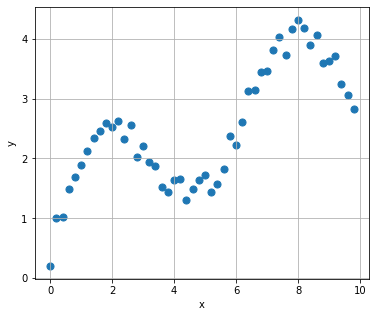

In [337]:
plt.figure(figsize=(6, 5))
plt.scatter(X_reg, y_reg, cmap='bwr', s=50, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

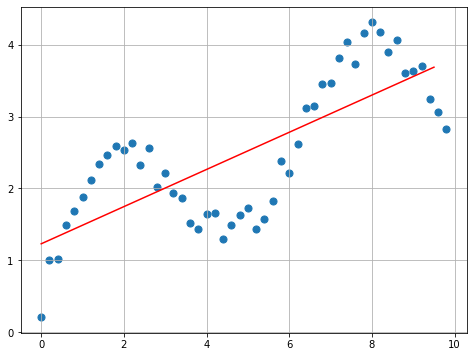

In [356]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
X_test = np.arange(0, 10, 0.5)[:,np.newaxis]
plot_reg(X_reg, y_reg, reg_lr, X_test)

Теперь добавим функции второй, третей и четвертых степеней.

In [354]:
X_reg_new = np.hstack([X_reg, X_reg**2, X_reg**3, X_reg**4])
X_test_new = np.hstack([X_test, X_test**2, X_test**3, X_test**4])

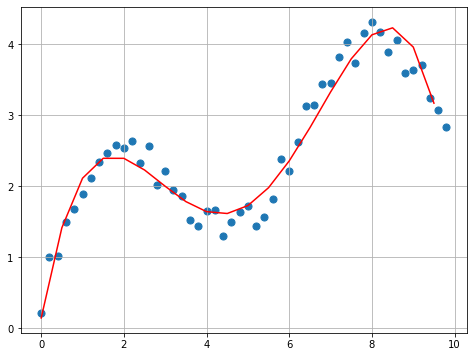

In [355]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
plot_reg(X_reg_new, y_reg, reg_lr, X_test_new)

В изначальной линейной регрессии мы находимся в пространстве линейных алгоритмов:
$$a(x) = a_0x_0 + a_1x_1 + \ldots a_nx_n$$
    
Но теперь место фич у нас заняли полиномиальные функции и мы получили степенную функцию:

$$a(x) = a_0 + a_1x^1 + \ldots a_nx^n$$

Чтобы не делать это вручную, есть механизм `PolynomialFeatures`

In [358]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_reg2 = poly.fit_transform(X_reg)
X_test2 = poly.fit_transform(X_test)

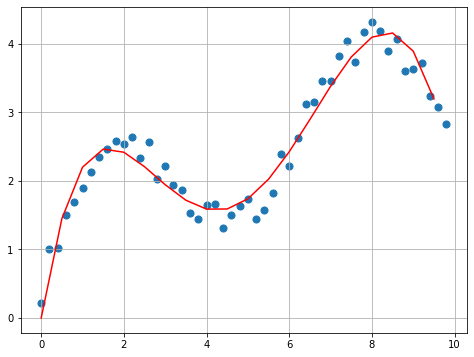

In [362]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
plot_reg(X_reg2, y_reg, reg_lr, X_test2, dim=1)

С другой стороны мы можем догадаться, что тут не степенные функции и использовать те функции, которые нужны.

In [364]:
X_reg3 = np.hstack([X_reg, X_reg**0.5, np.sin(X_reg)])
X_test3 = np.hstack([X_test, X_test**0.5, np.sin(X_test)])

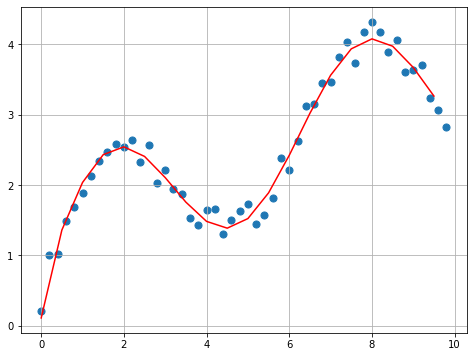

In [365]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
plot_reg(X_reg3, y_reg, reg_lr, X_test3, dim=0)

## Масштабирование (Scaling)

Рассмотрим такую ситуацию у вас есть данные о дороге с 2мя признаками: `длинна участка дороги` и `толщина слоя асфальта`. Обе величины даются в одной метрике - метры. И нам нужно бинарно классифицировать качество дороги: `хорошая`,`плохая`.

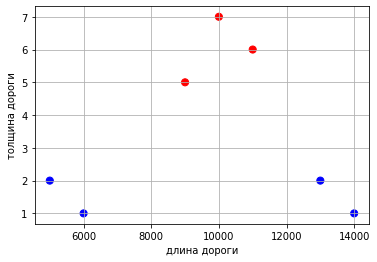

In [399]:
X = np.array([[10000, 7],[11000, 6],[9000, 5],[5000, 2],[6000, 1],[13000, 2],[14000, 1]])
y = np.array([1,1,1,0,0,0,0]) # 1 - хорошие, 0 - плохие
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50, alpha=1)
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Из логики нам будет очевидно, что первый признак практически бесполезен, а второй играет ключевую роль. Но, если запустить KNN или любой другой `метрический` алгоритм, мы получим обратную ситуацию, признак который в абсолюте больше - **важнее**, чем признак, который очень мало отличается.  

In [400]:
model = KNN(3)
model.fit(X,y)
X_bad = [[10000, 1]] 
y_pred = model.predict(X_bad)
X_new = np.vstack([X, X_bad])
y_new = np.hstack([y, y_pred])


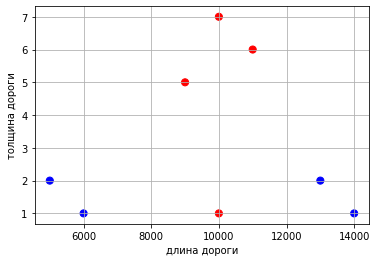

In [401]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=50, alpha=1)
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Почему новая точка классифицировалась неправильно? Потому что, с точки зрения эвклидовой метрики, до `хороших` ей действительно `ближе`.

$$\rho((10000, 7), (10000, 1)) = \sqrt{(10000 - 10000)^2 + (7-1)^2} = \sqrt{6^2} << \rho((6000, 1), (10000, 1)) = \sqrt{4000^2 + (1-1)^2}$$

Чтобы справиться с этой проблемой важно `масштабировать` численные признаки, чтобы они были корректно сравнимы.

Есть 2 подхода к масштабированию:
* Нормализация (MinMax Scaling) $x^* = \frac{x-x_{min}}{x_{max} - x_{min}}$
* Стандартизация (Standart Scaling) $x^* = \frac{x-\mu}{\sigma}$, где $\mu$ - среднее, а $\sigma$ - стандартное отклонение

In [405]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stan = StandardScaler().fit(X)
norm = MinMaxScaler().fit(X)
X_st = stan.transform(X)
X_norm = norm.transform(X)

Метод `fit` подбирает параметры масштабирования, а метод `transform` непосредственно преобразует значения. 

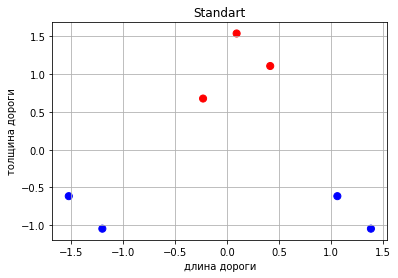

In [407]:
plt.scatter(X_st[:,0], X_st[:,1], c=y, cmap='bwr', s=50, alpha=1)
plt.title('Standart')
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

И вот теперь мы можем верно классифицировать данные, не забыв трансформировать точку, которую предсказываем

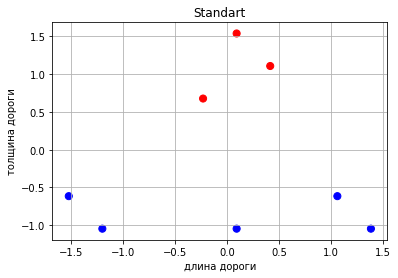

In [413]:
model = KNN(3)
model.fit(X_st,y)
X_bad = stan.transform([[10000, 1]]) 
y_pred = model.predict(X_bad)

X_new = np.vstack([X_st, X_bad])
y_new = np.hstack([y, y_pred])
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=50, alpha=1)
plt.title('Standart')
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Интересный факт, что любые древесные алгоритмы: DecisionTree, RandomForest - не требуют масштабирования. Потому что они работают на пороговых правилах и все признаки у них остаются независимыми.

Резюме: Хороший паттерн делать масштабирование - `всегда`. Потому что для метрических алгоритмов оно необходимо, а для деревьев оно ничего не портит. 

# Категориальные признаки

Окей, с числовыми признаками разобрались, но ведь доставать необходимую информацию нужно еще и из категориальных признаков. Как с ними можно работать?

## Label Encoding

Рассмотрим выборку UCI bank, в которой большая часть признаков – категориальные.

In [415]:
import pandas as pd
df = pd.read_csv('bank_train.csv')
labels = pd.read_csv('bank_train_target.csv', header=None)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


Чтобы найти решение, давайте рассмотрим признак education:

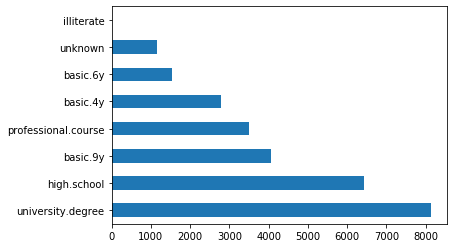

In [416]:
df['education'].value_counts().plot.barh();

Естественным решением такой проблемы было бы однозначное отображение каждого значения в уникальное число. К примеру, мы могли бы преобразовать `university.degree` в 0, а `basic.9y` в 1. Эту простую операцию приходится делать часто, поэтому в модуле `preprocessing` библиотеки `sklearn` именно для этой задачи реализован класс `LabelEncoder`:

In [417]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

Метод `fit` этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод `transform` непосредственно преобразует значения в числа. 

{0: 'basic.4y', 1: 'basic.6y', 2: 'basic.9y', 3: 'high.school', 4: 'illiterate', 5: 'professional.course', 6: 'university.degree', 7: 'unknown'}


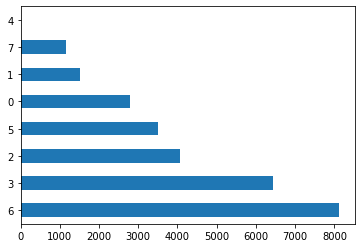

In [418]:
mapped_education = pd.Series(label_encoder.fit_transform(df['education']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

Что произойдет, если у нас появятся данные с другими категориями?

In [419]:
try:
    label_encoder.transform(df['education'].replace('high.school', 'high_school'))
except Exception as e:
    print('Error:', e)

Error: y contains previously unseen labels: 'high_school'


Таким образом, при использовании этого подхода мы всегда должны быть уверены, что признак не может принимать неизвестных ранее значений. К этой проблеме мы вернемся чуть позже, а сейчас заменим весь столбец education на преобразованный:

In [420]:
df['education'] = mapped_education
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,3,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,6,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,0,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,6,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,6,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


Продолжим преобразование для всех столбцов, имеющих тип `object` – именно этот тип задается в pandas для таких данных.

In [421]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['education'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,8,2,3,0,0,0,1,4,1,901,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
1,46,0,1,6,0,2,0,0,1,3,208,2,999,0,1,1.4,93.444,-36.1,4.963,5228.1
2,49,1,1,0,1,2,2,1,4,3,131,5,999,0,1,1.4,94.465,-41.8,4.864,5228.1
3,31,9,1,6,0,0,0,0,3,3,404,1,999,0,1,-2.9,92.469,-33.6,1.044,5076.2
4,42,3,1,6,0,2,0,1,7,1,85,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


Основная проблема такого представления заключается в том, что числовой код создал евклидово представление для данных.

К примеру, нами неявным образом была введена алгебра над значениями работы - мы можем вычесть работу клиента 1 из работы клиента 2:

In [422]:
df.loc[1].job - df.loc[2].job

-1.0

Конечно же, эта операция не имеет никакого смысла. Но именно на этом основаны метрики близости объектов, что делает бессмысленным применение метода ближайшего соседа на данных в таком виде. Аналогичным образом, никакого смысла не будет иметь применение линейных моделей.

Пример внизу: у класса 1 `precision` = 0, `recall`=0, `f1-score`=0 -никакая классификация не осуществялется.

In [496]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def logistic_regression_accuracy_on(dataframe, labels):
    features = dataframe.as_matrix()
    train_features, test_features, train_labels, test_labels = \
        train_test_split(features, labels)

    logit = LogisticRegression()
    logit.fit(train_features, train_labels)
    return classification_report(test_labels, logit.predict(test_features))

print(logistic_regression_accuracy_on(df[categorical_columns], labels))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      6051
           1       0.00      0.00      0.00       848

    accuracy                           0.88      6899
   macro avg       0.44      0.50      0.47      6899
weighted avg       0.77      0.88      0.82      6899



Однако для древесных моделей `LabelEncoding` вполне сгодится.

Для того, чтобы мы смогли применять линейные модели на таких данных нам необходим другой метод, который называется One-Hot Encoding

## One-Hot Encoding

Предположим, что некоторый признак может принимать 10 разных значений. В этом случае one hot encoding подразумевает создание 10 признаков, все из которых равны нулю *за исключением одного*. На позицию, соответствующую численному значению признака мы помещаем 1:

In [442]:
one_hot_example = pd.DataFrame([{i: 0 for i in range(10)}])
one_hot_example.loc[0, 6] = 1
one_hot_example

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0


По умолчанию `OneHotEncoder` преобразует данные в разреженную матрицу, чтобы не расходовать память на хранение многочисленных нулей. Однако в этом примере размер данных не является для нас проблемой, поэтому мы будем использовать "плотное" представление.

In [443]:
onehot_encoder = OneHotEncoder(sparse=False)

In [444]:
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Мы получили 53 столбца - именно столько различных уникальных значений могут принимать категориальные столбцы исходной выборки. Преобразованные с помощью One-Hot Encoding данные начинают обретать смысл для линейной модели:

In [497]:
print(logistic_regression_accuracy_on(encoded_categorical_columns, labels))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6118
           1       0.64      0.18      0.28       781

    accuracy                           0.90      6899
   macro avg       0.77      0.58      0.61      6899
weighted avg       0.87      0.90      0.87      6899



Проблема возникает когда, количество различных значений у категориального признака сильно возрастает. В этом случае `OneHotEncoding` станет очень затратным по памяти (даже если будем использовать разряженные таблицы). Но в целом лучше всегда использовать `OneHot`.

## Хэширование признаков (Hashing trick)
С течением времени категориальные признаки могут принимать новых значений. Это затрудняет использование уже обученных моделей на новых данных. Кроме того, `LabelEncoder` подразумевает предварительный анализ всей выборки и хранение построенных отображений в памяти, что затрудняет работу в режиме больших данных.

Для решения этих проблем существует более простой подход к векторизации категориальных признаков, основанный на хэшировании, известный как hashing trick. 

Хэш-функции могут помочь нам в задаче поиска уникальных кодов для различных значений признака, к примеру:

In [471]:
for s in ('university.degree', 'high.school', 'illiterate'):
    print(s, '->', hash(s))

university.degree -> -2878898948654924781
high.school -> -1465604040750685296
illiterate -> 773410555698286747


Отрицательные и настолько большие по модулю значения нам не подойдут. Ограничим область значений хэш-функции:

In [472]:
hash_space = 25
for s in ('university.degree', 'high.school', 'illiterate'):
    print(s, '->', hash(s) % hash_space)

university.degree -> 19
high.school -> 4
illiterate -> 22


Представим, что у нас в выборке есть холостой студент, которому позвонили в понедельник, тогда его вектор признаков будет сформирован аналогично One-Hot Encoding, но в едином пространстве фиксированного размера для всех признаков:

In [473]:
hashing_example = pd.DataFrame([{i: 0.0 for i in range(hash_space)}])
for s in ('job=student', 'marital=single', 'day_of_week=mon'):
    print(s, '->', hash(s) % hash_space)
    hashing_example.loc[0, hash(s) % hash_space] = 1
hashing_example

job=student -> 9
marital=single -> 17
day_of_week=mon -> 4


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Стоит обратить внимание, что в этом примере хэшировались не только значения признаков, а пары **название признака + значение признака**. Это необходимо, чтобы разделить одинаковые значения разных признаков между собой, к примеру:

In [474]:
assert hash('no') == hash('no')
assert hash('housing=no') != hash('loan=no')

Может ли произойти коллизия хэш-функции, то есть совпадение кодов для двух разных значений? Нетрудно доказать, что при достаточном размере пространства хэширования это происходит редко, но даже в тех случаях, когда это происходит, это не будет приводить к существенному ухудшению качества классификации или регрессии.

Возможно, вы спросите: "а что за хрень вообще происходит?", и покажется, что при хэшировании признаков страдает здравый смысл. Возможно, но эта эвристика – по сути, единственный подход к тому, чтобы работать с категориальными признаками, у которых много уникальных значений. Более того, эта техника себя хорошо зарекомендовала по результатами на практике. Подробней про хэширование признаков (learning to hash) можно почитать в [этом](https://arxiv.org/abs/1509.05472) обзоре, а также в [материалах](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture06-linclass.pdf) Евгения Соколова.

# Random Search
![title](https://i.stack.imgur.com/cIDuR.png)

На прошлом семинаре мы перебирали параметры с помощью `GridSearch` - это честный перебор всех параметров, который может оказаться очень долгим. На самом деле можно двигаться гораздо быстрее с помощью RandomizedSearch.
Алгоритм:
* Выбираем рандомную точку $x$ в пространстве заданных параметров
* Пока не кончится количество итераций(заданное заранее)
  * Выбираем новую точку $y$ c помощью [какого-нибудь алгоритма выбора точки на сфере]
  * Если $f(y) < f(x)$, то x = y

In [501]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris # в sklearn есть встроенные датасеты

iris=load_iris()
params = {'max_depth': np.arange(1, 100)}
rs = RandomizedSearchCV(
        estimator = DTC(), #классификатор
        param_distributions = params, # передираемый параметр
        cv = 5, #кросс-валидация
        scoring = 'accuracy' #результат - доля правильных ответов
    )
rs.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [502]:
pd.DataFrame(rs.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000385,0.000096,0.000233,6.893891e-05,77,{'max_depth': 77},0.966667,0.966667,0.9,1.0,1.0,0.966667,0.036515,1
6,0.000295,0.000007,0.000188,9.887906e-07,11,{'max_depth': 11},0.966667,0.966667,0.9,1.0,1.0,0.966667,0.036515,1
7,0.000308,0.000013,0.000193,4.372885e-06,15,{'max_depth': 15},0.966667,0.966667,0.9,1.0,1.0,0.966667,0.036515,1


Обычно `RandomSearch` работает слегка хуже, но гораздо быстрее `GridSearch`, поэтому тут ваш выбор: либо точный результат, либо скорость.

# Blending

И на финал мы познакомимся с внутренним устройством классификаторов и попытаемся сделать свой смешанный классификатор.

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Это происходит за счет того, что разные модели могут хранить в себе разные скрытые зависимости от данных, которые могут вместе дать синергию.

Посмотрим на наш небольшой класс классификатора.

In [522]:
from sklearn.base import BaseEstimator, ClassifierMixin
class BlendClassifier(BaseEstimator, ClassifierMixin):# предок класса всех классификаторов
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1 
        self.clf2 = clf2
        self.alpha = alpha #параметр смешивания

    def fit(self, X, y): #обучаем классификатор
        self.X_ = X
        self.y_ = y 
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        return self

    def predict(self, X): #возвращаем значения
        predict1 = self.clf1.predict(X)
        predict2 = self.clf2.predict(X)
        
        return np.round(predict1 * self.alpha + predict2 * (1 - self.alpha))

    def predict_proba(self, X): #возвращаем вероятности
        predict1 = self.clf1.predict_proba(X)
        predict2 = self.clf2.predict_proba(X)
        
        return predict1 * self.alpha + predict2 * (1 - self.alpha)

In [523]:
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.ensemble import RandomForestClassifier as RF
clf = BlendClassifier(
        clf1 = SGD(loss = 'log'), 
        clf2 = RF(n_estimators = 50)
    )
clf.fit(iris.data, iris.target)

BlendClassifier(alpha=0.5,
                clf1=SGDClassifier(alpha=0.0001, average=False,
                                   class_weight=None, early_stopping=False,
                                   epsilon=0.1, eta0=0.0, fit_intercept=True,
                                   l1_ratio=0.15, learning_rate='optimal',
                                   loss='log', max_iter=1000,
                                   n_iter_no_change=5, n_jobs=None,
                                   penalty='l2', power_t=0.5, random_state=None,
                                   shuffle=True, tol=0.001,
                                   validation_fraction=0.1, verbose=0,
                                   warm_...t=False),
                clf2=RandomForestClassifier(bootstrap=True, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None

In [524]:
cross_val_score(clf, iris.data, iris.target, cv=5, scoring=metrics.scorer.accuracy_scorer)

array([0.66666667, 0.9       , 0.93333333, 0.93333333, 1.        ])

## Полезные ссылки:
* [Model Tuning Grid, Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
* [Статья про метрики](https://habrahabr.ru/company/ods/blog/328372/)
* [Roc-auc](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
* [Связь AUC-ROC и AUC-PR](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)
* [Ultimate guide to Binary Classifiction Metrics](https://towardsdatascience.com/the-ultimate-guide-to-binary-classification-metrics-c25c3627dd0a)

- [Статья](http://habrahabr.ru/post/228963/) "Как заставить работать бинарный классификатор чуточку лучше" на Habrahabr
- [ROC-кривая](http://www.machinelearning.ru/wiki/index.php?title=ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)
- [Характеристики](https://en.wikipedia.org/wiki/Precision_and_recall) бинарного классификатора
- [One vs. All и One vs. One](https://en.wikipedia.org/wiki/Multiclass_classification)
- [Quora](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set) про несбаланированные выборки
- про несбаланированные выборки на [ресурсе](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) Machine Learning Mastery